In [38]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
import os
path = "/Users/devdgenus6572gmail.com/Desktop/IIT/neural network/train/"
files = os.listdir(path)
files = [f for f in os.listdir(path) if not f.startswith('.')]
print(files)

classes = {files[i]: int(files[i]) for i in range(0, 9)}

print(classes)

['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']
{'9': 9, '0': 0, '7': 7, '6': 6, '1': 1, '8': 8, '4': 4, '3': 3, '2': 2}


In [40]:
import cv2

In [41]:
X = []
Y = []

for cl in classes:
    pth=path+cl
#    print(pth)
    for img_name in os.listdir(pth):
#        print(img_name)
        img = cv2.imread(pth+"/"+img_name,0)
#        print(img)
        X.append(img)
        Y.append(cl)
print('dataset created')


dataset created


In [42]:
pd.Series(Y).value_counts()

9    100
0    100
7    100
6    100
1    100
8    100
4    100
3    100
2    100
dtype: int64

In [43]:
print(type(X))
X = np.array(X)
Y = np.array(Y)
print(type(X))
X.shape


<class 'list'>
<class 'numpy.ndarray'>


(900, 32, 32)

actual number 3


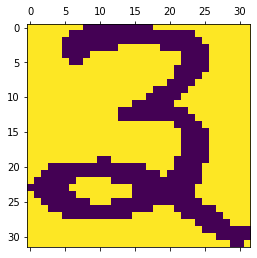

In [44]:
plt.matshow(X[700])
print('actual number',Y[700])

In [45]:
# X_flattened = X.reshape(len(X),32*32)
# X_flattened.shape

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [47]:
len(X_test)

180

In [48]:
len(X_train)

720

In [49]:
X_train[0].shape

(32, 32)

In [50]:
X_train[0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ...,   0,   0, 255],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

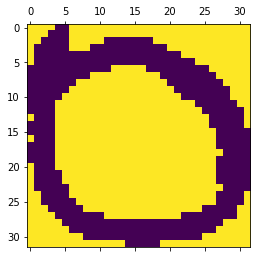

In [51]:
plt.matshow(X_train[6])

In [52]:
y_train[:7]

array(['9', '6', '7', '4', '6', '8', '0'], dtype='<U1')

In [53]:
X_train.shape

(720, 32, 32)

# Scaling is done below but without scaling also it is running well.

In [54]:
X_train=X_train/255
X_test=X_test/255

In [55]:
X_train[0]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [56]:
X_train_flattened=X_train.reshape(len(X_train),32*32)
X_test_flattened=X_test.reshape(len(X_test),32*32)
X_test_flattened.shape



(180, 1024)

In [57]:
X_train_flattened.shape

(720, 1024)

In [58]:
y_train = np.array(y_train)

y_train = y_train.astype(int)
y_train

array([9, 6, 7, 4, 6, 8, 0, 7, 6, 9, 9, 1, 8, 2, 6, 9, 4, 6, 2, 1, 3, 8,
       4, 7, 3, 8, 6, 3, 2, 3, 6, 8, 6, 3, 1, 1, 1, 7, 9, 1, 0, 6, 1, 0,
       0, 4, 8, 2, 6, 6, 1, 2, 6, 9, 7, 8, 1, 7, 0, 8, 2, 8, 6, 1, 6, 1,
       8, 1, 2, 6, 8, 4, 4, 7, 2, 9, 0, 7, 8, 2, 6, 1, 0, 1, 8, 8, 4, 4,
       3, 7, 4, 3, 7, 0, 2, 1, 2, 2, 9, 2, 0, 2, 2, 9, 0, 8, 1, 0, 0, 9,
       1, 0, 6, 3, 4, 8, 0, 0, 9, 8, 6, 9, 4, 6, 2, 0, 7, 7, 8, 2, 0, 3,
       6, 0, 9, 8, 0, 1, 9, 4, 6, 8, 9, 4, 1, 1, 9, 1, 2, 3, 7, 4, 4, 3,
       6, 9, 2, 6, 9, 9, 7, 7, 6, 2, 9, 0, 6, 3, 7, 8, 4, 4, 8, 8, 4, 0,
       4, 1, 1, 0, 7, 3, 3, 9, 0, 8, 1, 0, 0, 1, 9, 3, 9, 6, 2, 2, 2, 8,
       8, 9, 9, 2, 9, 9, 6, 0, 3, 8, 3, 2, 0, 8, 3, 8, 0, 4, 3, 3, 6, 7,
       1, 6, 3, 9, 9, 4, 7, 1, 1, 3, 6, 7, 8, 1, 1, 6, 8, 9, 7, 9, 6, 7,
       4, 3, 2, 8, 6, 3, 8, 7, 7, 9, 8, 1, 4, 7, 0, 3, 1, 3, 0, 9, 2, 8,
       7, 9, 8, 0, 7, 4, 8, 7, 9, 3, 0, 0, 3, 7, 7, 9, 2, 4, 2, 6, 8, 0,
       7, 4, 0, 7, 2, 4, 9, 3, 7, 6, 4, 0, 3, 8, 2,

In [59]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(1024,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=20)

Epoch 1/20
23/23 [==============================] - 0s 813us/step - loss: 1.1394 - accuracy: 0.6444
Epoch 2/20
23/23 [==============================] - 0s 620us/step - loss: 0.3094 - accuracy: 0.9167
Epoch 3/20
23/23 [==============================] - 0s 684us/step - loss: 0.1977 - accuracy: 0.9500
Epoch 4/20
23/23 [==============================] - 0s 699us/step - loss: 0.1559 - accuracy: 0.9597
Epoch 5/20
23/23 [==============================] - 0s 901us/step - loss: 0.0984 - accuracy: 0.9833
Epoch 6/20
23/23 [==============================] - 0s 814us/step - loss: 0.0777 - accuracy: 0.9917
Epoch 7/20
23/23 [==============================] - 0s 713us/step - loss: 0.0547 - accuracy: 0.9958
Epoch 8/20
23/23 [==============================] - 0s 719us/step - loss: 0.0441 - accuracy: 0.9958
Epoch 9/20
23/23 [==============================] - 0s 738us/step - loss: 0.0391 - accuracy: 1.0000
Epoch 10/20
23/23 [==============================] - 0s 707us/step - loss: 0.0344 - accuracy: 0.9986

In [60]:
X_train_flattened.shape

(720, 1024)

In [61]:
y_test = np.array(y_test)

y_test = y_test.astype(int)
y_test

array([9, 2, 7, 8, 9, 3, 7, 0, 9, 9, 0, 8, 2, 0, 3, 8, 0, 1, 1, 9, 7, 3,
       4, 6, 8, 6, 9, 2, 4, 8, 7, 3, 7, 8, 4, 4, 9, 8, 1, 7, 9, 7, 6, 3,
       4, 4, 7, 8, 1, 2, 1, 6, 8, 7, 7, 7, 0, 6, 6, 8, 9, 6, 3, 1, 7, 0,
       4, 8, 6, 1, 4, 8, 2, 6, 0, 2, 6, 1, 9, 4, 8, 0, 8, 9, 2, 3, 6, 1,
       7, 8, 6, 8, 2, 2, 3, 6, 9, 0, 4, 3, 8, 1, 8, 6, 2, 7, 4, 7, 3, 0,
       2, 3, 3, 1, 2, 1, 2, 2, 9, 2, 6, 7, 7, 1, 3, 9, 7, 2, 1, 0, 8, 3,
       6, 9, 3, 7, 4, 2, 1, 7, 7, 9, 4, 6, 3, 7, 2, 0, 8, 9, 9, 4, 1, 8,
       1, 0, 9, 1, 6, 9, 6, 4, 4, 6, 1, 1, 9, 9, 3, 1, 6, 6, 9, 1, 8, 2,
       8, 3, 9, 9])

In [62]:
model.evaluate(X_test_flattened,y_test)

6/6 [==============================] - 0s 801us/step - loss: 0.1464 - accuracy: 0.9444


[0.1463753581047058, 0.9444444179534912]

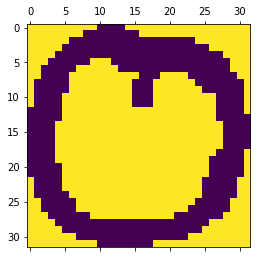

In [63]:
plt.matshow(X_test[7])

In [64]:
model.predict(X_test_flattened)

6/6 [==============================] - 0s 664us/step


array([[6.7767161e-01, 2.3348872e-02, 2.6456751e-02, ..., 6.9222368e-02,
        1.0064162e-01, 9.9966329e-01],
       [4.5465145e-04, 7.9022245e-03, 9.9382210e-01, ..., 2.7024981e-03,
        6.0999084e-01, 2.8123960e-03],
       [1.6352411e-02, 7.7680314e-01, 6.4319032e-01, ..., 9.9996728e-01,
        3.8438491e-03, 6.9664992e-02],
       ...,
       [2.3187776e-01, 7.6531291e-02, 9.9178153e-01, ..., 9.9071795e-01,
        7.0821005e-04, 5.9402451e-02],
       [1.5001148e-01, 6.2983477e-01, 5.4939021e-03, ..., 6.3546523e-03,
        7.6190436e-01, 9.9971879e-01],
       [1.5899645e-01, 3.1828254e-01, 2.9565090e-01, ..., 1.7037131e-02,
        3.3612732e-02, 9.7844309e-01]], dtype=float32)

In [65]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

6/6 [==============================] - 0s 644us/step


array([6.7767161e-01, 2.3348872e-02, 2.6456751e-02, 1.5770228e-01,
       7.6168627e-01, 9.9172874e-05, 6.8424714e-01, 6.9222368e-02,
       1.0064162e-01, 9.9966329e-01], dtype=float32)

In [66]:
np.argmax(y_predicted[0])

9

In [67]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[0]

9

In [68]:
y_test

array([9, 2, 7, 8, 9, 3, 7, 0, 9, 9, 0, 8, 2, 0, 3, 8, 0, 1, 1, 9, 7, 3,
       4, 6, 8, 6, 9, 2, 4, 8, 7, 3, 7, 8, 4, 4, 9, 8, 1, 7, 9, 7, 6, 3,
       4, 4, 7, 8, 1, 2, 1, 6, 8, 7, 7, 7, 0, 6, 6, 8, 9, 6, 3, 1, 7, 0,
       4, 8, 6, 1, 4, 8, 2, 6, 0, 2, 6, 1, 9, 4, 8, 0, 8, 9, 2, 3, 6, 1,
       7, 8, 6, 8, 2, 2, 3, 6, 9, 0, 4, 3, 8, 1, 8, 6, 2, 7, 4, 7, 3, 0,
       2, 3, 3, 1, 2, 1, 2, 2, 9, 2, 6, 7, 7, 1, 3, 9, 7, 2, 1, 0, 8, 3,
       6, 9, 3, 7, 4, 2, 1, 7, 7, 9, 4, 6, 3, 7, 2, 0, 8, 9, 9, 4, 1, 8,
       1, 0, 9, 1, 6, 9, 6, 4, 4, 6, 1, 1, 9, 9, 3, 1, 6, 6, 9, 1, 8, 2,
       8, 3, 9, 9])

In [69]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[13,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 21,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0, 19,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 15,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 16,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 22,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 22,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 22,  1],
       [ 0,  0,  0,  0,  0,  0,  5,  0,  0, 20]], dtype=int32)>

Text(69.0, 0.5, 'Truth')

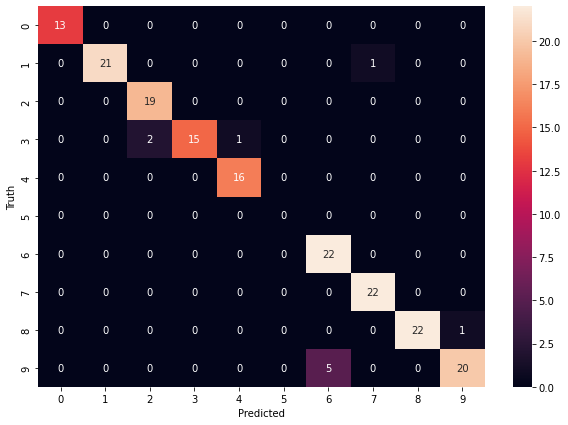

In [70]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')